In [3]:
#import necessary librairies 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [7]:
# Read movie dara 
df_movie = pd.read_csv('datasets/rotten_tomatoes_movies.csv')
df_movie.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [19]:
df_movie.dtypes


rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

In [21]:
# Check data distribution 
df_movie.describe(include='all')

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17712,17712,17391,9134,17712,17693,17518,16170,17360,16546,...,17213,17668,17668.000000,17668.000000,17264,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
unique,17712,17106,17389,9132,6,1106,8933,12989,17330,5804,...,3046,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,m/0814255,Hamlet,"Wisecracking mercenary Deadpool meets Russell,...",High Life is as visually arresting as it is ch...,R,Drama,Clint Eastwood,Woody Allen,Werner Herzog,2002-01-01,...,Paramount Pictures,Rotten,NaN,NaN,Upright,NaN,NaN,NaN,NaN,NaN
freq,1,6,2,2,6377,1887,38,33,4,29,...,517,7565,NaN,NaN,9390,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,60.884763,57.139801,NaN,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.443348,68.370047,NaN,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,5.000000,NaN,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.000000,12.000000,NaN,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,67.000000,28.000000,NaN,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,86.000000,75.000000,NaN,78.000000,2.498800e+04,23.000000,44.000000,24.000000


In [20]:
# Check data distribution 
df_movie.describe(include='object')

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,production_company,tomatometer_status,audience_status
count,17712,17712,17391,9134,17712,17693,17518,16170,17360,16546,17328,17213,17668,17264
unique,17712,17106,17389,9132,6,1106,8933,12989,17330,5804,2271,3046,3,2
top,m/0814255,Hamlet,"Wisecracking mercenary Deadpool meets Russell,...",High Life is as visually arresting as it is ch...,R,Drama,Clint Eastwood,Woody Allen,Werner Herzog,2002-01-01,2016-08-10,Paramount Pictures,Rotten,Upright
freq,1,6,2,2,6377,1887,38,33,4,29,1235,517,7565,9390


## Data Preprocessing

In [9]:
# Data preprocessing I: content_rating feature
print(f'Content Rating category: {df_movie.content_rating.unique()}')

Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

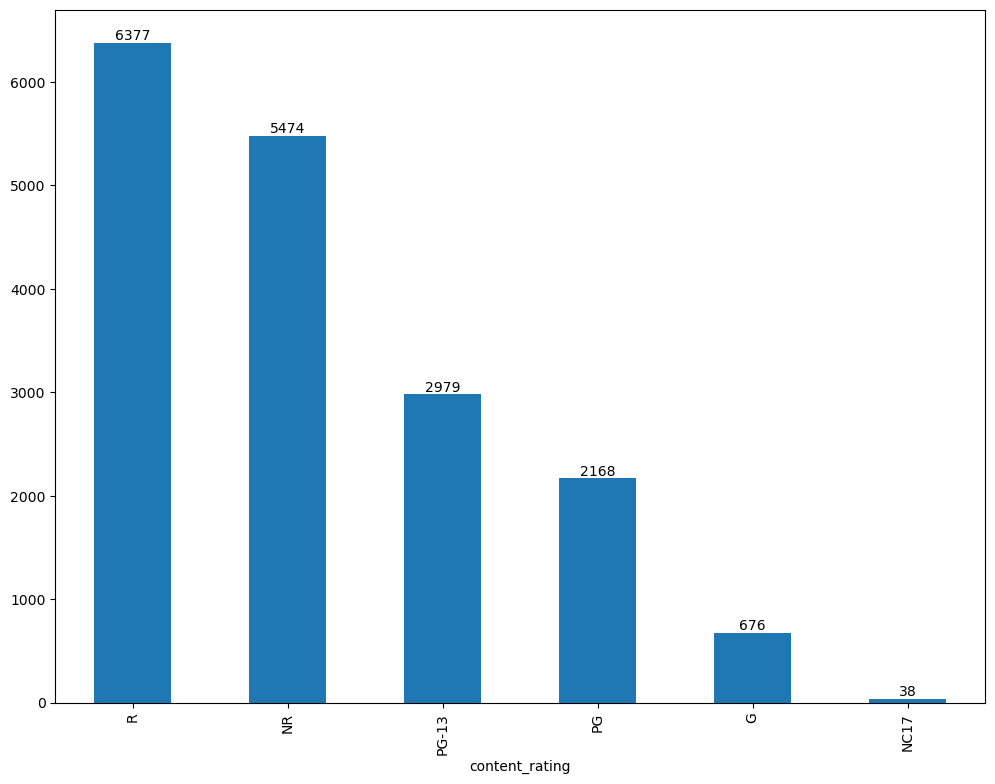

In [15]:
#Visualise the distrivution of each category in content_rating feature
ax = df_movie.content_rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])


In [18]:
# One hot enconding content_rating feature
content_rating = pd.get_dummies(df_movie.content_rating)
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,False,False,False,True,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,True,False,False,False
4,True,False,False,False,False,False


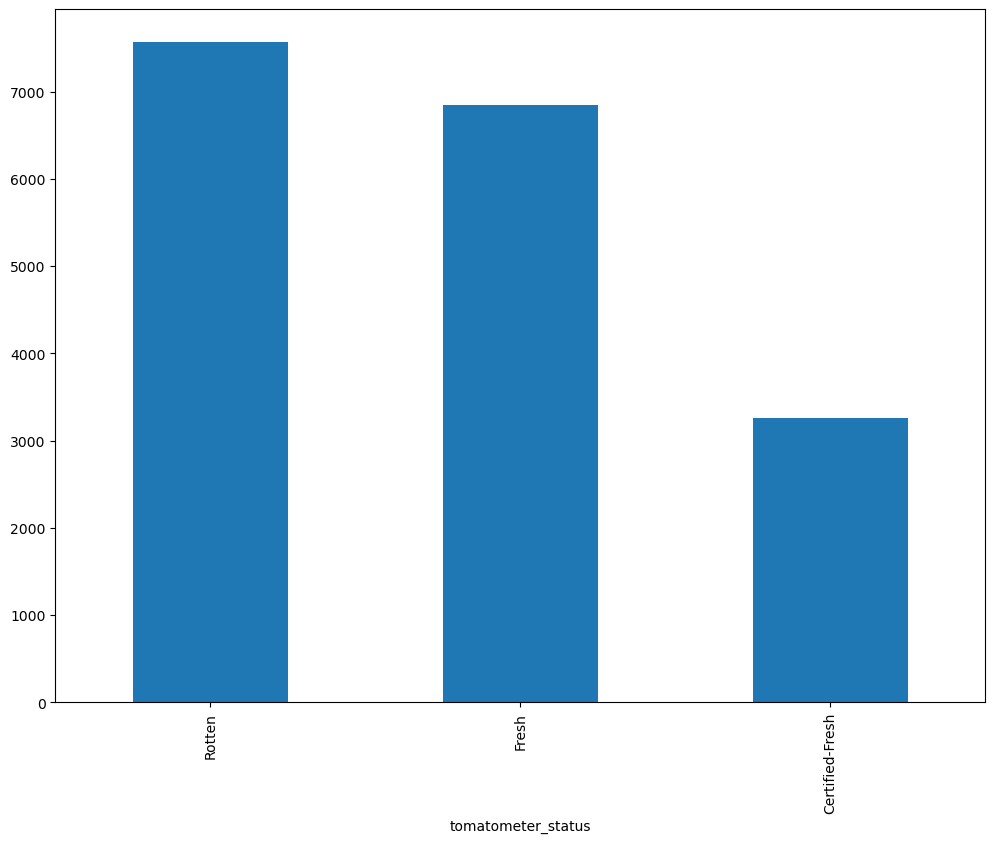

In [ ]:
# plot tomatometter status
ax = df_movie.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))

In [ ]:
print(f'Audience status category: {df.movie.Audience}')